In [1]:
# Principal Component
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
import matplotlib as plot
import sklearn as sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [103]:
df = pd.read_csv('finalNormalTotal_NEW.csv')# raw data with missing data
df

,country_region,sub_region_1,date,Adrenal crisis,Ageusia,Allergic conjunctivitis,Amenorrhea,Angular cheilitis,Anosmia,Asphyxia,...,Subdural hematoma,Tachypnea,Tenderness,Thyroid nodule,Trichoptilosis,Upper respiratory tract infection,Urethritis,Urinary urgency,Ventricular fibrillation,hospitalized_new
0,United States,Alaska,2020-03-23,0.242395,1.000000,NaN,0.190876,NaN,1.000000,0.017390,...,0.173611,0.454545,0.147368,0.000000,0.058757,0.431432,0.044330,NaN,0.069176,6
1,United States,Alaska,2020-03-30,0.134936,0.282752,0.041096,0.070828,NaN,0.322087,0.053443,...,0.000000,0.546320,0.115088,0.142392,0.785311,0.250794,0.148454,0.650794,0.076297,14
2,United States,Alaska,2020-04-06,0.189892,0.131008,NaN,0.343337,0.156448,0.003374,0.021066,...,0.088542,0.261472,0.063860,0.082181,0.676836,0.137826,0.176289,NaN,NaN,11
3,United States,Alaska,2020-04-13,0.001472,NaN,NaN,0.000000,0.042283,0.103815,0.033084,...,0.023727,0.138528,0.203509,0.544345,0.572881,0.130369,0.000000,NaN,NaN,5
4,United States,Alaska,2020-04-20,0.058391,NaN,0.000000,0.475390,NaN,NaN,0.013856,...,NaN,0.242424,0.476491,0.194467,0.229379,0.077337,0.184536,NaN,0.268566,-36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,United States,Wyoming,2020-09-07,0.029605,0.210046,0.000000,NaN,0.000000,0.024441,0.078663,...,0.699208,1.000000,0.767857,0.102564,NaN,0.035044,0.284585,NaN,NaN,9
126,United States,Wyoming,2020-09-14,0.066729,0.602740,NaN,1.000000,NaN,0.156425,0.079646,...,0.168865,NaN,0.607143,0.825641,0.202532,0.093450,0.296443,0.162791,NaN,15
127,United States,Wyoming,2020-09-21,0.136748,0.305936,NaN,0.437326,NaN,0.191341,0.023599,...,0.459103,0.173913,0.316964,0.335897,0.230380,0.036713,0.169960,NaN,0.491713,19
128,United States,Wyoming,2020-09-28,0.331767,0.504566,NaN,0.111421,NaN,0.175978,0.038840,...,0.501319,0.487923,0.607143,0.487179,0.070886,NaN,0.335968,NaN,0.569061,20


In [153]:
df_pca=df.fillna(df.mean()) 
df_pca

,country_region,sub_region_1,date,Adrenal crisis,Ageusia,Allergic conjunctivitis,Amenorrhea,Angular cheilitis,Anosmia,Asphyxia,...,Subdural hematoma,Tachypnea,Tenderness,Thyroid nodule,Trichoptilosis,Upper respiratory tract infection,Urethritis,Urinary urgency,Ventricular fibrillation,hospitalized_new
0,United States,Alaska,2020-03-23,0.242395,1.000000,0.337980,0.190876,0.329669,1.000000,0.017390,...,0.173611,0.454545,0.147368,0.000000,0.058757,0.431432,0.044330,0.340649,0.069176,6
1,United States,Alaska,2020-03-30,0.134936,0.282752,0.041096,0.070828,0.329669,0.322087,0.053443,...,0.000000,0.546320,0.115088,0.142392,0.785311,0.250794,0.148454,0.650794,0.076297,14
2,United States,Alaska,2020-04-06,0.189892,0.131008,0.337980,0.343337,0.156448,0.003374,0.021066,...,0.088542,0.261472,0.063860,0.082181,0.676836,0.137826,0.176289,0.340649,0.294846,11
3,United States,Alaska,2020-04-13,0.001472,0.345430,0.337980,0.000000,0.042283,0.103815,0.033084,...,0.023727,0.138528,0.203509,0.544345,0.572881,0.130369,0.000000,0.340649,0.294846,5
4,United States,Alaska,2020-04-20,0.058391,0.345430,0.000000,0.475390,0.329669,0.291814,0.013856,...,0.261018,0.242424,0.476491,0.194467,0.229379,0.077337,0.184536,0.340649,0.268566,-36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,United States,Wyoming,2020-09-07,0.029605,0.210046,0.000000,0.393062,0.000000,0.024441,0.078663,...,0.699208,1.000000,0.767857,0.102564,0.341093,0.035044,0.284585,0.340649,0.294846,9
126,United States,Wyoming,2020-09-14,0.066729,0.602740,0.337980,1.000000,0.329669,0.156425,0.079646,...,0.168865,0.302293,0.607143,0.825641,0.202532,0.093450,0.296443,0.162791,0.294846,15
127,United States,Wyoming,2020-09-21,0.136748,0.305936,0.337980,0.437326,0.329669,0.191341,0.023599,...,0.459103,0.173913,0.316964,0.335897,0.230380,0.036713,0.169960,0.340649,0.491713,19
128,United States,Wyoming,2020-09-28,0.331767,0.504566,0.337980,0.111421,0.329669,0.175978,0.038840,...,0.501319,0.487923,0.607143,0.487179,0.070886,0.103257,0.335968,0.340649,0.569061,20


In [46]:
x = pd.read_csv('finalNormalTotal_NEW.csv')# raw data with missing data
x.drop('country_region', axis=1, inplace=True)
x.drop('sub_region_1', axis=1, inplace=True)
x.drop('date', axis=1, inplace=True)
corr_mat=x.corr()
corr_mat.to_excel("Corr_X.xlsx")
corr_mat

,Adrenal crisis,Ageusia,Allergic conjunctivitis,Amenorrhea,Angular cheilitis,Anosmia,Asphyxia,Atheroma,Auditory hallucination,Balance disorder,...,Subdural hematoma,Tachypnea,Tenderness,Thyroid nodule,Trichoptilosis,Upper respiratory tract infection,Urethritis,Urinary urgency,Ventricular fibrillation,hospitalized_new
Adrenal crisis,1.000000,0.330678,-0.108635,0.185440,-0.153662,0.436511,-0.068765,0.342987,0.219688,-0.006738,...,0.021967,0.180194,0.100835,0.000387,-0.013074,0.109022,-0.212711,-0.126861,0.117171,0.429947
Ageusia,0.330678,1.000000,-0.214110,0.070465,0.037265,0.803266,-0.206825,0.168262,-0.048839,0.108912,...,0.161873,0.312567,0.063603,0.066618,-0.131700,0.145203,0.220380,0.137946,0.232901,0.602505
Allergic conjunctivitis,-0.108635,-0.214110,1.000000,0.057303,0.072460,-0.214571,0.199182,-0.193978,0.202881,-0.046639,...,-0.115087,-0.310145,0.037135,0.304777,-0.099170,-0.382077,-0.109268,0.024507,-0.120588,-0.107421
Amenorrhea,0.185440,0.070465,0.057303,1.000000,-0.100918,0.105206,-0.018449,0.195027,0.251613,0.124514,...,0.156541,0.012246,-0.029737,0.203957,-0.070448,-0.088620,-0.031525,0.132172,0.270180,0.300547
Angular cheilitis,-0.153662,0.037265,0.072460,-0.100918,1.000000,-0.102519,0.110131,-0.257858,-0.088997,0.024461,...,0.078894,-0.152399,-0.079773,0.440743,-0.427160,-0.272350,0.066990,0.052377,0.008228,-0.100931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper respiratory tract infection,0.109022,0.145203,-0.382077,-0.088620,-0.272350,0.369435,-0.148437,0.118969,-0.260232,-0.276797,...,-0.240660,0.457670,-0.168222,-0.244482,0.234455,1.000000,-0.090796,0.103304,-0.058145,-0.088004
Urethritis,-0.212711,0.220380,-0.109268,-0.031525,0.066990,-0.038648,-0.176410,-0.149357,-0.106485,0.012080,...,-0.021743,-0.077260,0.252272,0.122622,-0.011084,-0.090796,1.000000,0.008761,0.099734,0.049075
Urinary urgency,-0.126861,0.137946,0.024507,0.132172,0.052377,0.053815,-0.125167,-0.034116,0.060159,0.172255,...,0.149981,-0.138744,-0.109542,-0.026253,0.092480,0.103304,0.008761,1.000000,0.218496,0.315570
Ventricular fibrillation,0.117171,0.232901,-0.120588,0.270180,0.008228,0.182582,-0.030284,0.224399,0.134997,0.139573,...,0.223023,0.165578,0.094679,0.187494,-0.086122,-0.058145,0.099734,0.218496,1.000000,0.337428


In [47]:
df_pca.isnull().any()

country_region                       False
sub_region_1                         False
date                                 False
Adrenal crisis                       False
Ageusia                              False
                                     ...  
Upper respiratory tract infection    False
Urethritis                           False
Urinary urgency                      False
Ventricular fibrillation             False
hospitalized_new                     False
Length: 104, dtype: bool

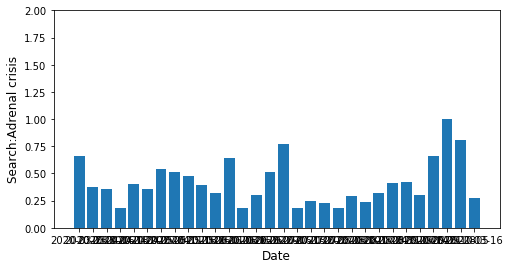

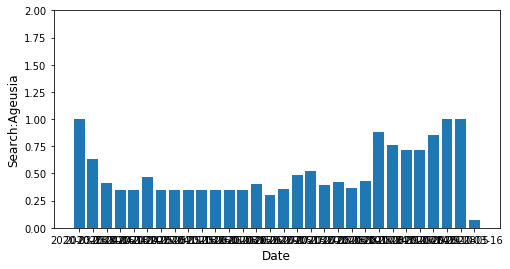

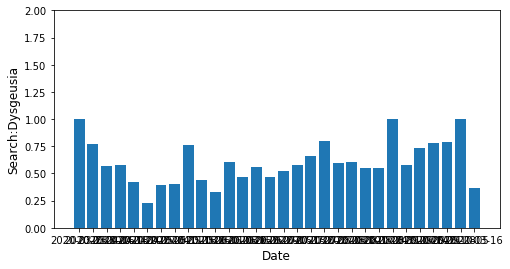

In [48]:
#Task2.1 Raw Data Previous Visualization Standarized Data

plt.figure(figsize=(8,4))
plt.ylim(0,2.0)
plt.bar(df_pca['date'],df_pca['Adrenal crisis'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search:Adrenal crisis', fontsize=12)

plt.figure(figsize=(8,4))
plt.ylim(0,2)
plt.bar(df_pca['date'],df_pca['Ageusia'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search:Ageusia', fontsize=12)

plt.figure(figsize=(8,4))
plt.ylim(0,2)
plt.bar(df_pca['date'],df_pca['Dysgeusia'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search:Dysgeusia', fontsize=12)


plt.show()

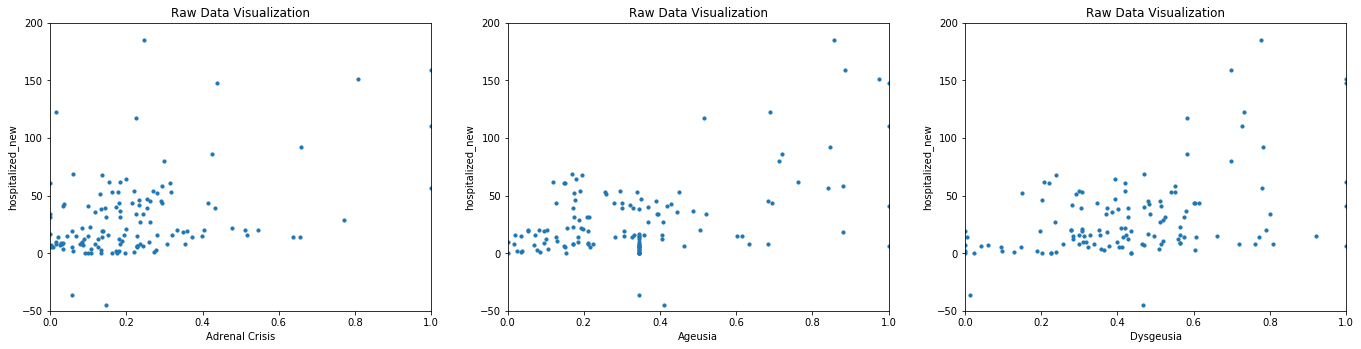

In [50]:
marker_size=10
plt.subplot(131)
plt.xlim(0,1)
plt.ylim(-50,200)
plt.scatter(df_pca['Adrenal crisis'],df_pca['hospitalized_new'],marker_size)
plt.xlabel('Adrenal Crisis')
plt.ylabel('hospitalized_new')
plt.title("Raw Data Visualization")

marker_size=10
plt.subplot(132)
plt.xlim(0,1)
plt.ylim(-50,200)
plt.scatter(df_pca['Ageusia'],df_pca['hospitalized_new'],marker_size)
plt.xlabel('Ageusia')
plt.ylabel('hospitalized_new')
plt.title("Raw Data Visualization")

marker_size=10
plt.subplot(133)
plt.xlim(0,1)
plt.ylim(-50,200)
plt.scatter(df_pca['Dysgeusia'],df_pca['hospitalized_new'],marker_size)
plt.xlabel('Dysgeusia')
plt.ylabel('hospitalized_new')
plt.title("Raw Data Visualization")


plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.3)
plt.show()

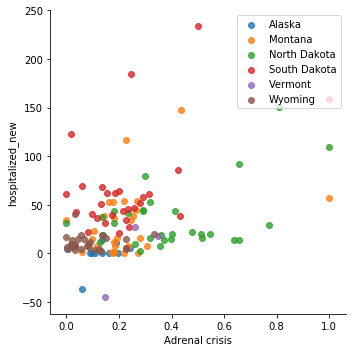

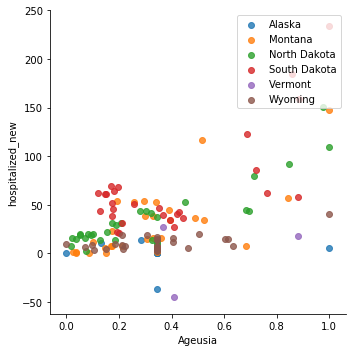

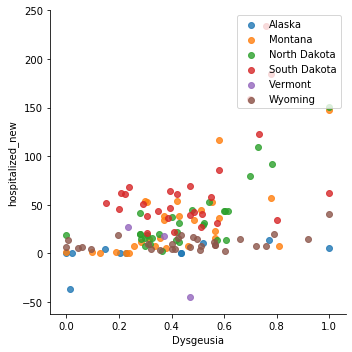

In [51]:
# Use the 'hue' argument to provide a factor variable

sns.lmplot( x='Adrenal crisis',y='hospitalized_new', data=df_pca, fit_reg=False, hue='sub_region_1', legend=False)
plt.legend(loc='upper right')

sns.lmplot( x='Ageusia',y='hospitalized_new', data=df_pca, fit_reg=False, hue='sub_region_1', legend=False)
plt.legend(loc='upper right')

sns.lmplot( x='Dysgeusia',y='hospitalized_new', data=df_pca, fit_reg=False, hue='sub_region_1', legend=False)
plt.legend(loc='upper right')


In [154]:
date = pd.read_csv('finalNormalTotal_DATE2.csv')
df_pca['date2']=date['date2']

In [85]:
import plotly
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_date = df_pca

data_slider = []

for days in df_date['date2'].unique():

    # I select the day
    df_days = df_date[df_date['date2'] == days]

    for col in df_days.columns:  # I transform the columns into string type so I can:
        df_days[col] = df_days[col].astype(str)

    ### create the dictionary with the data for the current year
    data_one_day = dict(
                        type='choropleth',
                        locations=["AK","MT","ND","SD","VT", "WY"], # Spatial coordinates
                        z = df_days['Ageusia'].astype(float), # Data to be color-coded
                        locationmode = 'USA-states', # set of locations match entries in `locations`
                        colorscale = 'Reds',
                        colorbar_title = "Ageusia Average per State"
                        )
 
    data_slider.append(data_one_day)
    

##  I create the steps for the slider
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Search Day {}'.format(i)) # label to be displayed for each step (day)
    step['args'][1][i] = True
    steps.append(step)

##  I create the 'sliders' object from the 'steps' 
sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 


# I set up the layout (including slider option)
layout = dict(geo=dict(scope='world',
                       projection={'type': 'mercator'}),
              sliders=sliders)
       


# I create the figure object:
fig = dict(data=data_slider, layout=layout) 


# to plot in the notebook
plotly.offline.iplot(fig)


C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
df_date = df_pca

data_slider = []

for days in df_date['date2'].unique():

    # I select the day
    df_days = df_date[df_date['date2'] == days]

    for col in df_days.columns:  # I transform the columns into string type so I can:
        df_days[col] = df_days[col].astype(str)

    ### create the dictionary with the data for the current year
    data_one_day = dict(
                        type='choropleth',
                        locations=["AK","MT","ND","SD","VT", "WY"], # Spatial coordinates
                        z = df_days['Dysgeusia'].astype(float), # Data to be color-coded
                        locationmode = 'USA-states', # set of locations match entries in `locations`
                        colorscale = 'Reds',
                        colorbar_title = "Dysgeusia Average per State"
                        )
 
    data_slider.append(data_one_day)
    

##  I create the steps for the slider
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Search Day {}'.format(i)) # label to be displayed for each step (day)
    step['args'][1][i] = True
    steps.append(step)

##  I create the 'sliders' object from the 'steps' 
sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 


# I set up the layout (including slider option)
layout = dict(geo=dict(scope='world',
                       projection={'type': 'mercator'}),
              sliders=sliders)
       


# I create the figure object:
fig = dict(data=data_slider, layout=layout) 


# to plot in the notebook
plotly.offline.iplot(fig)


C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
df_pca2=df_pca
df_pca2.drop('country_region', axis=1, inplace=True)
df_pca2.drop('sub_region_1', axis=1, inplace=True)
df_pca2.drop('date', axis=1, inplace=True)
df_pca2.drop('date2', axis=1, inplace=True)
df_pca2.head()

,Adrenal crisis,Ageusia,Allergic conjunctivitis,Amenorrhea,Angular cheilitis,Anosmia,Asphyxia,Atheroma,Auditory hallucination,Balance disorder,...,Subdural hematoma,Tachypnea,Tenderness,Thyroid nodule,Trichoptilosis,Upper respiratory tract infection,Urethritis,Urinary urgency,Ventricular fibrillation,hospitalized_new
0,0.242395,1.000000,0.337980,0.190876,0.329669,1.000000,0.017390,0.447195,0.065826,0.339399,...,0.173611,0.454545,0.147368,0.000000,0.058757,0.431432,0.044330,0.340649,0.069176,6
1,0.134936,0.282752,0.041096,0.070828,0.329669,0.322087,0.053443,0.125413,0.078431,0.428571,...,0.000000,0.546320,0.115088,0.142392,0.785311,0.250794,0.148454,0.650794,0.076297,14
2,0.189892,0.131008,0.337980,0.343337,0.156448,0.003374,0.021066,0.453795,0.354797,0.414923,...,0.088542,0.261472,0.063860,0.082181,0.676836,0.137826,0.176289,0.340649,0.294846,11
3,0.001472,0.345430,0.337980,0.000000,0.042283,0.103815,0.033084,0.216997,0.492997,0.232029,...,0.023727,0.138528,0.203509,0.544345,0.572881,0.130369,0.000000,0.340649,0.294846,5
4,0.058391,0.345430,0.000000,0.475390,0.329669,0.291814,0.013856,0.580858,0.544818,0.515014,...,0.261018,0.242424,0.476491,0.194467,0.229379,0.077337,0.184536,0.340649,0.268566,-36


In [57]:
df_pca_stat=df_pca.describe()
df_pca_stat

,Adrenal crisis,Ageusia,Allergic conjunctivitis,Amenorrhea,Angular cheilitis,Anosmia,Asphyxia,Atheroma,Auditory hallucination,Balance disorder,...,Subdural hematoma,Tachypnea,Tenderness,Thyroid nodule,Trichoptilosis,Upper respiratory tract infection,Urethritis,Urinary urgency,Ventricular fibrillation,hospitalized_new
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.227550,0.345430,0.337980,0.393062,0.329669,0.291814,0.100347,0.340735,0.354797,0.407752,...,0.261018,0.302293,0.385998,0.394612,0.341093,0.103257,0.296253,0.340649,0.294846,31.976923
std,0.199417,0.251469,0.250584,0.215991,0.167074,0.261541,0.186448,0.199704,0.199065,0.227720,...,0.154484,0.205008,0.219863,0.197991,0.230078,0.110853,0.192141,0.215297,0.188054,39.403786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-45.000000
25%,0.099104,0.171706,0.147421,0.270751,0.301008,0.105305,0.034181,0.192491,0.221886,0.231384,...,0.144935,0.154307,0.225240,0.284039,0.171586,0.045501,0.173732,0.194407,0.155697,8.000000
50%,0.183415,0.330366,0.337980,0.381089,0.329669,0.220476,0.057582,0.307599,0.354797,0.412092,...,0.260761,0.280147,0.382731,0.394612,0.300920,0.103257,0.296253,0.340649,0.294846,19.000000
75%,0.281008,0.407512,0.400891,0.528172,0.337711,0.352993,0.086467,0.463686,0.503193,0.560732,...,0.327524,0.397741,0.492473,0.498520,0.468804,0.103257,0.334498,0.453767,0.376370,44.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.699208,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,234.000000


In [58]:
# Calculate scores for variables
from factor_analyzer import FactorAnalyzer
df_sc= FactorAnalyzer(n_factors=101,rotation="varimax")
df_sc

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=101, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [59]:
df_sc.fit(df_pca2)
#get the loadings
loadings=df_sc.loadings_
#Resultados Loadings
results=pd.DataFrame.from_records(loadings)
results

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.146299,0.246336,-0.031775,0.079934,-0.000039,-0.024770,0.015853,-0.020485,0.022460,-0.069905,...,0.001790,0.005229,0.005999,0.002826,0.006837,0.003503,0.001236,0.000552,-0.000041,0.0
1,0.098237,0.856333,-0.072080,-0.006813,-0.012556,0.003223,0.051160,-0.003382,0.059600,0.026125,...,0.005196,-0.049314,-0.003395,0.005912,-0.028900,-0.006957,-0.027751,-0.017741,-0.078156,0.0
2,-0.103717,-0.083189,0.878413,0.098151,0.047407,-0.016910,-0.058342,-0.002117,0.016409,0.006105,...,-0.012345,0.001845,-0.007164,0.001636,-0.002781,0.000118,0.000061,-0.000370,0.000028,0.0
3,-0.060843,0.019368,0.017675,-0.028991,0.059479,0.031805,0.108389,-0.037084,-0.072036,-0.043909,...,-0.004159,0.007319,-0.005415,0.000571,0.005050,-0.002480,-0.000946,0.000186,0.000064,0.0
4,-0.119079,-0.000026,0.006549,-0.038477,0.001316,-0.004661,-0.008564,0.037823,-0.006864,0.926712,...,-0.000491,0.004831,0.004193,-0.000270,-0.003350,0.001178,-0.000754,-0.000310,-0.000111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.906391,0.030839,-0.005146,-0.045873,-0.043705,-0.023040,0.019900,-0.005343,-0.004048,-0.045480,...,-0.017235,-0.071974,-0.018658,-0.017533,-0.002945,0.024340,-0.090113,-0.026291,-0.049000,0.0
97,-0.048097,0.063732,-0.053744,-0.053954,0.036680,-0.011148,0.038958,-0.012055,0.091258,0.004369,...,-0.013724,0.012772,-0.003176,0.005940,-0.001106,0.000736,0.000694,-0.000678,-0.000136,0.0
98,0.019458,0.050508,0.010264,0.007048,0.010389,0.050762,0.086732,0.068795,0.016073,0.017078,...,0.005551,-0.001925,-0.001375,-0.007139,0.004307,0.001229,-0.000377,0.000513,-0.000137,0.0
99,-0.021896,0.110135,-0.053765,0.015946,0.007035,0.009950,0.891407,0.028330,0.074659,-0.008609,...,0.025760,0.006621,-0.003346,-0.002710,0.003414,0.000957,-0.000902,-0.000550,0.000047,0.0


In [60]:
sc=results[[0,1,2]]
sc

,0,1,2
0,0.146299,0.246336,-0.031775
1,0.098237,0.856333,-0.072080
2,-0.103717,-0.083189,0.878413
3,-0.060843,0.019368,0.017675
4,-0.119079,-0.000026,0.006549
...,...,...,...
96,0.906391,0.030839,-0.005146
97,-0.048097,0.063732,-0.053744
98,0.019458,0.050508,0.010264
99,-0.021896,0.110135,-0.053765


In [61]:
sc.rename(columns={0:'F1', 1:'F2', 2:'F3',3:'F4', 4:'F5'}, inplace=True)
df_sc=df_pca2.columns.tolist()
df_sc=pd.DataFrame(df_sc)
df_sc.rename(columns={0:'variable'},
                 inplace=True)
df_sc['F1']=sc['F1']
df_sc['F2']=sc['F2']
df_sc['F3']=sc['F3']
df_sc

C:\Users\Javier\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,variable,F1,F2,F3
0,Adrenal crisis,0.146299,0.246336,-0.031775
1,Ageusia,0.098237,0.856333,-0.072080
2,Allergic conjunctivitis,-0.103717,-0.083189,0.878413
3,Amenorrhea,-0.060843,0.019368,0.017675
4,Angular cheilitis,-0.119079,-0.000026,0.006549
...,...,...,...,...
96,Upper respiratory tract infection,0.906391,0.030839,-0.005146
97,Urethritis,-0.048097,0.063732,-0.053744
98,Urinary urgency,0.019458,0.050508,0.010264
99,Ventricular fibrillation,-0.021896,0.110135,-0.053765


In [62]:
import plotly.express as px
fig = px.scatter(df_sc, x='F1', y='F2', text='variable', size_max=100)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Variable Scores', title_x=0.5)
fig.show()
fig = px.scatter(df_sc, x='F2', y='F3', text='variable', size_max=100)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Variable Scores', title_x=0.5)
fig.show()
fig = px.scatter(df_sc, x='F1', y='F3', text='variable', size_max=100)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Variable Scores', title_x=0.5)
fig.show()

#F1 is more related with 

In [63]:
df_sc['conmunalities'] = df_sc['F1']+df_sc['F2']+df_sc['F3']
df_sc

,variable,F1,F2,F3,conmunalities
0,Adrenal crisis,0.146299,0.246336,-0.031775,0.360860
1,Ageusia,0.098237,0.856333,-0.072080,0.882491
2,Allergic conjunctivitis,-0.103717,-0.083189,0.878413,0.691506
3,Amenorrhea,-0.060843,0.019368,0.017675,-0.023800
4,Angular cheilitis,-0.119079,-0.000026,0.006549,-0.112556
...,...,...,...,...,...
96,Upper respiratory tract infection,0.906391,0.030839,-0.005146,0.932083
97,Urethritis,-0.048097,0.063732,-0.053744,-0.038109
98,Urinary urgency,0.019458,0.050508,0.010264,0.080231
99,Ventricular fibrillation,-0.021896,0.110135,-0.053765,0.034474


In [156]:
df_pca2.drop('hospitalized_new',axis=1, inplace=True)
df_pca3=df_pca2
df_pca3

,Adrenal crisis,Ageusia,Allergic conjunctivitis,Amenorrhea,Angular cheilitis,Anosmia,Asphyxia,Atheroma,Auditory hallucination,Balance disorder,...,Stridor,Subdural hematoma,Tachypnea,Tenderness,Thyroid nodule,Trichoptilosis,Upper respiratory tract infection,Urethritis,Urinary urgency,Ventricular fibrillation
0,0.242395,1.000000,0.337980,0.190876,0.329669,1.000000,0.017390,0.447195,0.065826,0.339399,...,0.513116,0.173611,0.454545,0.147368,0.000000,0.058757,0.431432,0.044330,0.340649,0.069176
1,0.134936,0.282752,0.041096,0.070828,0.329669,0.322087,0.053443,0.125413,0.078431,0.428571,...,0.687303,0.000000,0.546320,0.115088,0.142392,0.785311,0.250794,0.148454,0.650794,0.076297
2,0.189892,0.131008,0.337980,0.343337,0.156448,0.003374,0.021066,0.453795,0.354797,0.414923,...,0.203326,0.088542,0.261472,0.063860,0.082181,0.676836,0.137826,0.176289,0.340649,0.294846
3,0.001472,0.345430,0.337980,0.000000,0.042283,0.103815,0.033084,0.216997,0.492997,0.232029,...,0.203326,0.023727,0.138528,0.203509,0.544345,0.572881,0.130369,0.000000,0.340649,0.294846
4,0.058391,0.345430,0.000000,0.475390,0.329669,0.291814,0.013856,0.580858,0.544818,0.515014,...,0.486884,0.261018,0.242424,0.476491,0.194467,0.229379,0.077337,0.184536,0.340649,0.268566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.029605,0.210046,0.000000,0.393062,0.000000,0.024441,0.078663,0.340735,0.036530,0.436214,...,0.030457,0.699208,1.000000,0.767857,0.102564,0.341093,0.035044,0.284585,0.340649,0.294846
126,0.066729,0.602740,0.337980,1.000000,0.329669,0.156425,0.079646,0.416667,0.579909,0.514403,...,0.053299,0.168865,0.302293,0.607143,0.825641,0.202532,0.093450,0.296443,0.162791,0.294846
127,0.136748,0.305936,0.337980,0.437326,0.329669,0.191341,0.023599,1.000000,0.182648,0.897119,...,0.096447,0.459103,0.173913,0.316964,0.335897,0.230380,0.036713,0.169960,0.340649,0.491713
128,0.331767,0.504566,0.337980,0.111421,0.329669,0.175978,0.038840,0.823718,0.118721,0.510288,...,0.073604,0.501319,0.487923,0.607143,0.487179,0.070886,0.103257,0.335968,0.340649,0.569061


In [157]:
w=df_pca3
u, s, vt = np.linalg.svd(w-np.mean(w,0))

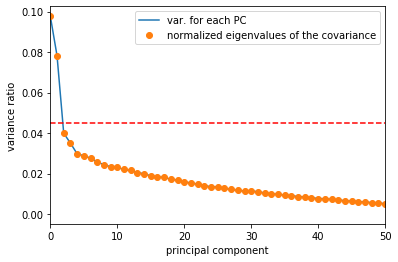

In [158]:
variances = np.var(w @ vt.T, 0)
plt.plot(variances/np.sum(variances), label="var. for each PC")
#plt.plot(np.cumsum(variances/np.sum(variances)), label="cumulative var. ratio")
plt.xlabel("principal component")
plt.xlim([0,50])
plt.ylabel("variance ratio")
plt.plot((s**2)/(np.sum(s**2)), "o", label="normalized eigenvalues of the covariance")
plt.axhline(y=0.045, color='r', linestyle='--')
plt.legend()
plt.show()

In [159]:
from sklearn.decomposition import PCA
n_components = 2
df_pca4=PCA(n_components=n_components)
principalComponents = df_pca4.fit_transform(df_pca3)
principal_pca_df = pd.DataFrame(data=principalComponents,columns=['PC'+str(i+1) for i in range(n_components)])
principal_pca_df

,PC1,PC2
0,1.923742,0.589073
1,1.699244,-0.304618
2,0.943795,-0.537321
3,0.579014,-0.583678
4,0.562395,-0.249007
...,...,...
125,0.033724,-0.028040
126,-0.574237,0.731558
127,-0.376639,0.211358
128,-0.382312,0.514642


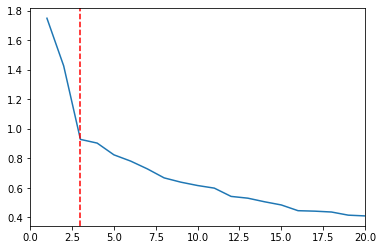

In [160]:
from scipy.cluster.hierarchy import linkage
z = linkage(principal_pca_df , method='average',metric='euclidean')
distances = z[-20:,2]

inverted_dist = distances[::-1]
cluster_num= np.arange (1, len(inverted_dist) + 1)

plt.plot(cluster_num,inverted_dist)
plt.xlim([0,20])
plt.axvline(x=3, color='r', linestyle='--')

plt.show()

In [161]:
principal_pca_df['hospitalized_new']= df['hospitalized_new']
principal_pca_df.head()

,PC1,PC2,hospitalized_new
0,1.923742,0.589073,6
1,1.699244,-0.304618,14
2,0.943795,-0.537321,11
3,0.579014,-0.583678,5
4,0.562395,-0.249007,-36


In [162]:
class KMeans1:
    def __init__(self, k=5, max_iters=100, verbose=True):
        self.k = k
        self.max_iters = max_iters
        self.verbose = verbose
    def fit(self, x):
        n,d = x.shape
        init_centers = np.random.choice(n, self.k, replace=False)
        mu = x[init_centers]
        for t in range(self.max_iters):
            distances = np.sum((mu[None,:,:] - x[:,None,:])**2, -1) # n x k
            membership = np.argmin(distances, 1)
            mu_new = mu.copy()
            for i in range(self.k):
                mu_new[i,:] = np.mean(x[membership==i], 0)
            if np.allclose(mu_new, mu):
                if self.verbose:
                    print(f'converged after {t} iterations, cost {np.sum(np.min(distances,1))}')
                break
            mu = mu_new
        return mu, membership

In [163]:
x, y = principal_pca_df[['PC1','PC2']], principal_pca_df['hospitalized_new']

In [164]:
x=np.array(x)
kmeans = KMeans1(3)
mu,cl = kmeans.fit(x)

converged after 9 iterations, cost 32.025030237497774


Text(0, 0.5, 'PC2')

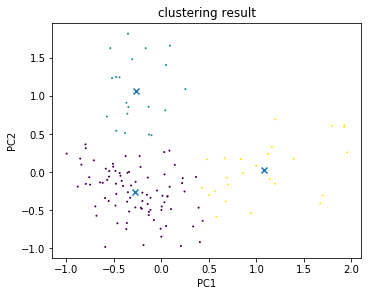

In [165]:
# plotting the result
fig, axes = plt.subplots(nrows=1, constrained_layout=True, figsize=(5, 4))
plt.scatter(x[:,0], x[:,1], c=cl, s=1,cmap=plt.cm.get_cmap("viridis", 3))
plt.scatter(mu[:,0], mu[:,1], marker='x',cmap=plt.cm.get_cmap("viridis", 3))
plt.title('clustering result')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [166]:
df_pca4 = pd.read_excel('finalDf_clean_ms_imputed.xlsx')# State average per variable imputed into missing data
principal_pca_df['sub_region_1'] = df_pca4['sub_region_1']
principal_pca_df.head(50)

,PC1,PC2,hospitalized_new,sub_region_1
0,1.923742,0.589073,6,Alaska
1,1.699244,-0.304618,14,Montana
2,0.943795,-0.537321,11,North Dakota
3,0.579014,-0.583678,5,South Dakota
4,0.562395,-0.249007,-36,Vermont
5,0.049165,-0.705207,0,Wyoming
6,0.205539,-0.967592,0,Alaska
7,0.405411,-0.916556,0,Montana
8,0.434212,-0.637676,0,North Dakota
9,0.334844,-0.711133,0,South Dakota


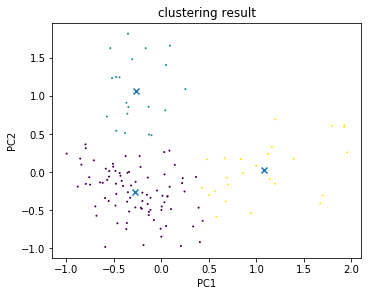

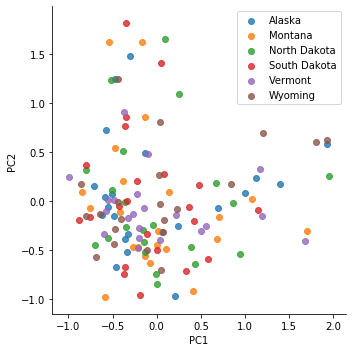

In [167]:
# plotting the result
fig, axes = plt.subplots(nrows=1, constrained_layout=True, figsize=(5, 4))
plt.scatter(x[:,0], x[:,1], c=cl, s=1,cmap=plt.cm.get_cmap("viridis", 5))
plt.scatter(mu[:,0], mu[:,1], marker='x',cmap=plt.cm.get_cmap("viridis", 5))
plt.title('clustering result')
plt.legend
plt.xlabel('PC1')
plt.ylabel('PC2')


sns.lmplot( x='PC1',y='PC2', data=principal_pca_df, fit_reg=False, hue='sub_region_1', legend=False)
plt.legend(loc='upper right')